<a href="https://colab.research.google.com/github/mohammadehsanii/Voice_Detection/blob/main/dataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining for Turkish Music Emotion Dataset**

### Prof. Giuseppe Longo and Prof. Roberta Siciliano.

*   Rabia Simal Capar
*   Hawzhin Tohidi
*   Mohammad Ehsani



# Introduction
This project aims to perform data preprocessing, analysis, dimensionality reduction, and model building on a dataset of Turkish music emotions using neural networks.

The dataset contains acoustic features and corresponding emotions (classes).

The project focuses on exploring the dataset, handling missing data, visualizing important features, applying Principal Component Analysis (PCA), and building a neural network classifier to predict the emotional class of the music samples.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

import warnings

warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Dataset Description
Source: The dataset used in this project is available from Google Drive.
File: Acoustic Features.csv


Target Variable: Class, representing the emotional class of music.


Features: Acoustic features such as _RMSenergy_Mean, _Lowenergy_Mean, _Fluctuation_Mean, etc.

In [ ]:
file_directory = 'Acoustic Features.csv'


# Load the dataset

raw_data = pd.read_csv(file_directory)

In [ ]:
raw_data2 = raw_data.copy()

# Shape and dimention of our raw dataset

In [ ]:
raw_data.shape

(400, 51)

# Prerview of Dataset

In [ ]:
raw_data.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


# Statistical  description of our Dataset

In [ ]:
raw_data.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [ ]:
# Categorical variable

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='object']

print('There are {} categorical variable\n'.format(len(categorical)))

print('The categorical variables is :', categorical)

There are 1 categorical variable

The categorical variables is : ['Class']


In [ ]:
# Numerical variables

numerical = [var for var in raw_data.columns if raw_data[var].dtype in ['float64', 'int64']]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:', numerical)

There are 50 numerical variables

The numerical variables are: ['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3', '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7', '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11', '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope', '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope', '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean', '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean', '_Spectralskewness_Mean', '_Spectralkurtosis_Mean', '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean', '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3', '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6', '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9', '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12', '_HarmonicChangeDetectionFunction_Mean',

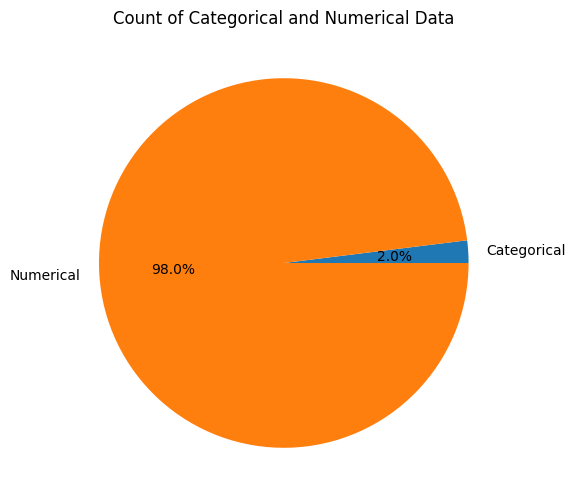

In [ ]:
# Define categorical and numerical data
categorical_count = len(categorical)
numerical_count = len(numerical)

# Calculate total data points
total = categorical_count + numerical_count

# Calculate percentages
categorical_percent = (categorical_count / total) * 100
numerical_percent = (numerical_count / total) * 100

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie([categorical_percent, numerical_percent], labels=["Categorical", "Numerical"], autopct="%1.1f%%")
plt.title("Count of Categorical and Numerical Data")
plt.show()

In [ ]:
# Handeling Missing Values

data_type = pd.DataFrame(raw_data.dtypes , columns = ["Data Types"])
count_nulls = pd.DataFrame(raw_data.isnull().sum(), columns = ["Nulls Count"])

dfNull = pd.concat([data_type, count_nulls], axis = 'columns')
dfNull

,Data Types,Nulls Count
Class,object,0
_RMSenergy_Mean,float64,0
_Lowenergy_Mean,float64,0
_Fluctuation_Mean,float64,0
_Tempo_Mean,float64,0
_MFCC_Mean_1,float64,0
_MFCC_Mean_2,float64,0
_MFCC_Mean_3,float64,0
_MFCC_Mean_4,float64,0
_MFCC_Mean_5,float64,0


As we can see, we dont have any missing value

In [ ]:
# Drop duplicates (entire rows considered as duplicates)
cleaned_data = raw_data.drop_duplicates()

In [ ]:
# Class distribution
class_distribution = cleaned_data['Class'].value_counts(normalize=True) * 100

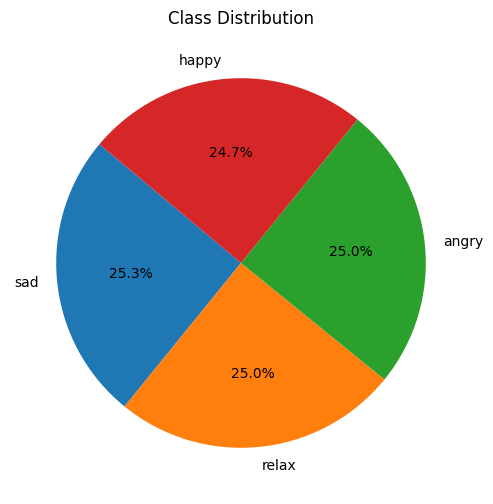

In [ ]:
# Plot the pie chart
plt.figure(figsize=(8, 6))  # Optional: adjust the size of the chart
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()


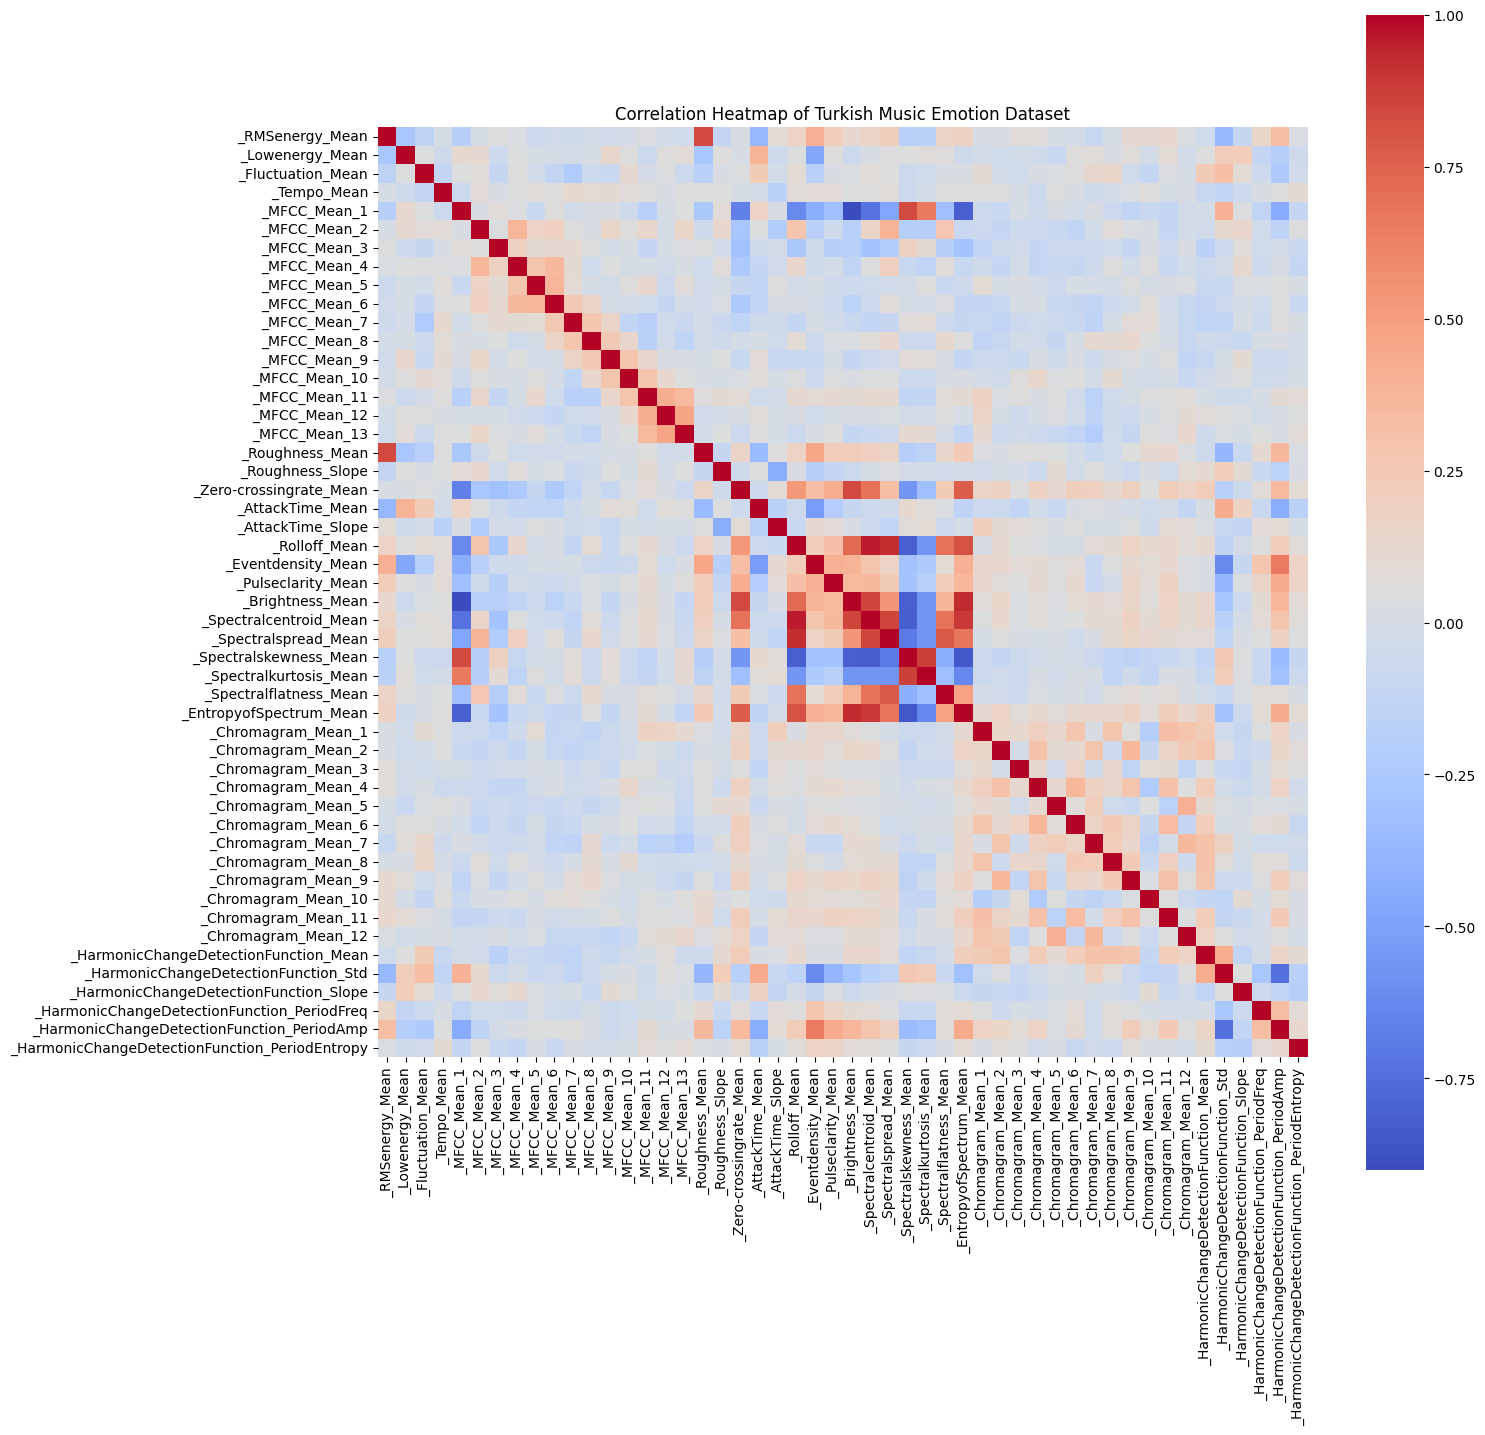

In [ ]:
# Calculate the correlation matrix
correlation = cleaned_data.iloc[:, 1:].corr()


# Plot the heatmap
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Turkish Music Emotion Dataset')
ax = sns.heatmap(correlation, square=True, annot=False , fmt='.2f', linecolor='white', cmap='coolwarm')
plt.show()

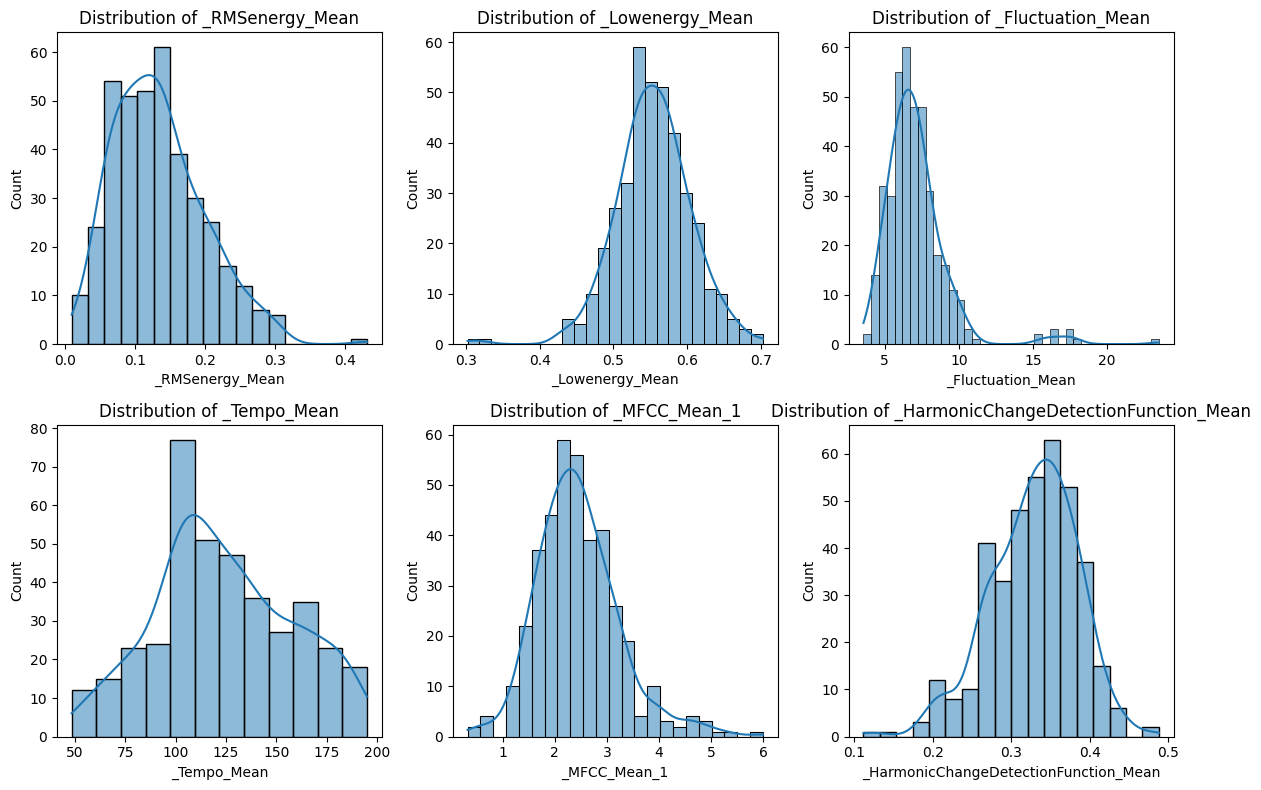

In [ ]:
# Features to visualize
features = ['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_HarmonicChangeDetectionFunction_Mean', ]

# Plot distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'Class' column(categorical to numerical)
LabelEncoder = LabelEncoder()
cleaned_data['Class_encoded'] = LabelEncoder.fit_transform(cleaned_data['Class'])

# Prepare the Data
Split the data into features (X) and target (y), then split them into training and testing sets:

In [ ]:
# Split the data into features and target
X = cleaned_data.drop(['Class', 'Class_encoded'], axis=1)
y = cleaned_data['Class_encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
# Convert target variables to one-hot encoding for neural networks
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)


# Build the Neural Network Model

In [ ]:
# Build the Neural Network Model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(y_train_nn.shape[1], activation='softmax'))

# Compile the Model

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train_nn, epochs=100, batch_size=32, validation_data=(X_test, y_test_nn), callbacks=[early_stopping])


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3163 - loss: 2.1352 - val_accuracy: 0.5000 - val_loss: 1.5413
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5366 - loss: 1.4788 - val_accuracy: 0.6923 - val_loss: 1.3567
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6822 - loss: 1.0733 - val_accuracy: 0.7949 - val_loss: 1.2455
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6899 - loss: 1.0414 - val_accuracy: 0.7949 - val_loss: 1.1793
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7678 - loss: 0.9322 - val_accuracy: 0.8077 - val_loss: 1.1309
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7581 - loss: 0.9346 - val_accuracy: 0.8077 - val_loss: 1.0941
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7875 - loss: 0.8592 - val_accuracy: 0.8077 - val_loss: 1.0455
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8640 - loss: 0.7496 - val_accuracy: 0.7949 - 

# Evaluate the Model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_nn)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8243 - loss: 0.7552
Test Accuracy: 82.05%


# Visualize Training Progress
Plot the training and validation accuracy over epochs to see if the model is improving.

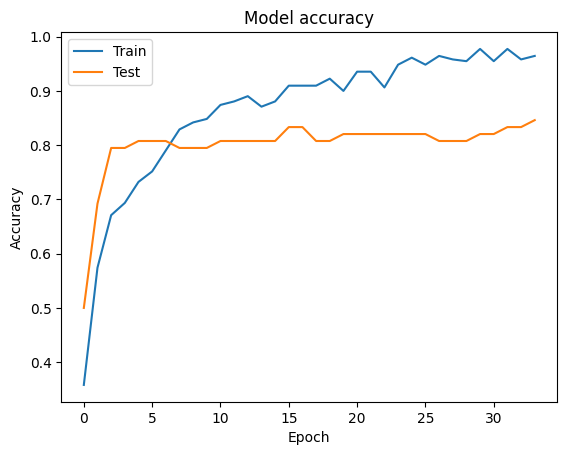

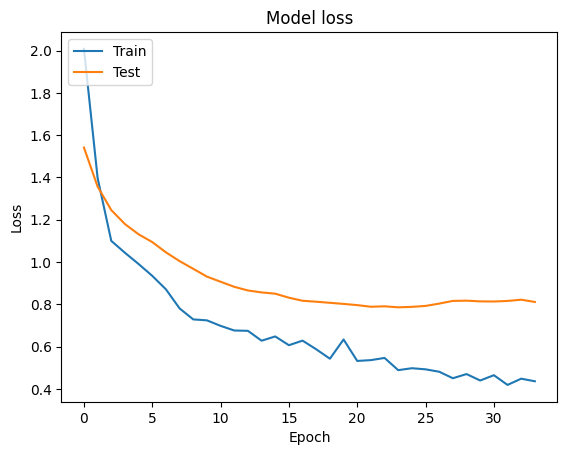

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/stepWARNING:tensorflow:5 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000018D646816C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


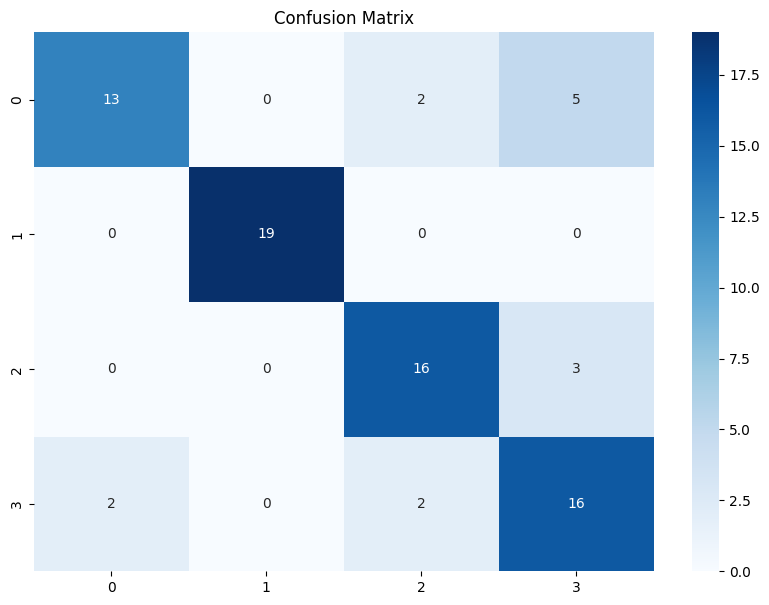

              precision    recall  f1-score   support

           0       0.87      0.65      0.74        20
           1       1.00      1.00      1.00        19
           2       0.80      0.84      0.82        19
           3       0.67      0.80      0.73        20

    accuracy                           0.82        78
   macro avg       0.83      0.82      0.82        78
weighted avg       0.83      0.82      0.82        78



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred_classes))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import librosa
import warnings

In [ ]:
from tensorflow.keras.models import load_model
import joblib

# Save the model and scaler
model.save('music_emotion_model.h5')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
# Load the model and scaler for future predictions
modelApp = load_model('music_emotion_model.h5')
scalerApp = joblib.load('scaler.joblib')

In [ ]:
import librosa
import numpy as np

def extract_features_from_song(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Feature 1: RMS Energy
    rms_mean = np.mean(librosa.feature.rms(y=y))

    # Feature 2: Low Energy (Fraction of energy below a certain threshold)
    low_energy_threshold = 0.1 * np.max(np.abs(y))  # 10% of max energy
    low_energy_fraction = np.sum(np.abs(y) < low_energy_threshold) / len(y)

    # Feature 3: Fluctuation Mean (simple diff)
    fluctuation_mean = np.mean(np.diff(y))

    # Feature 4: Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # Features 5-17: MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_means = np.mean(mfccs, axis=1)

    # Features 18-19: Roughness Mean and Slope (approximation using abs diff and gradient)
    roughness_mean = np.mean(np.abs(np.diff(y)))
    roughness_slope = np.mean(np.gradient(np.abs(np.diff(y))))

    # Feature 20: Zero-Crossing Rate Mean
    zero_crossing_rate_mean = np.mean(librosa.feature.zero_crossing_rate(y))

    # Features 21-22: Attack Time Mean and Slope (approximation using onset strength)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    attack_time_mean = np.mean(onset_env)
    attack_time_slope = np.mean(np.gradient(onset_env))

    # Feature 23: Spectral Rolloff
    rolloff_mean = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Feature 24: Event Density (placeholder using onset detection)
    event_density_mean = np.mean(librosa.onset.onset_detect(y=y, sr=sr))

    # Feature 25: Pulse Clarity (simplified using tempo)
    pulse_clarity_mean = np.mean(librosa.beat.tempo(y=y, sr=sr))

    # Feature 26: Brightness (using Spectral Centroid)
    brightness_mean = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Features 27-31: Spectral Features
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_spread_mean = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_skewness_mean = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))  # Placeholder
    spectral_kurtosis_mean = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))  # Placeholder
    spectral_flatness_mean = np.mean(librosa.feature.spectral_flatness(y=y))

    # Feature 32: Entropy of Spectrum
    entropy_of_spectrum_mean = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))

    # Features 33-44: Chromagram (12 chroma features)
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    chromagram_means = np.mean(chromagram, axis=1)

    # Features 45-50: Harmonic Change Detection Function
    harmonic_change_detection_mean = np.mean(librosa.effects.harmonic(y))
    harmonic_change_detection_std = np.std(librosa.effects.harmonic(y))
    harmonic_change_detection_slope = np.mean(np.gradient(librosa.effects.harmonic(y)))
    harmonic_change_detection_period_freq = np.mean(librosa.beat.beat_track(y=y, sr=sr)[1])
    harmonic_change_detection_period_amp = np.mean(np.abs(np.diff(librosa.effects.harmonic(y))))
    harmonic_change_detection_period_entropy = entropy_of_spectrum_mean  # Reusing spectral entropy

    # Combine all features into a single array
    features = np.hstack([
        rms_mean, low_energy_fraction, fluctuation_mean, tempo, mfccs_means, roughness_mean, roughness_slope,
        zero_crossing_rate_mean, attack_time_mean, attack_time_slope, rolloff_mean, event_density_mean,
        pulse_clarity_mean, brightness_mean, spectral_centroid_mean, spectral_spread_mean, spectral_skewness_mean,
        spectral_kurtosis_mean, spectral_flatness_mean, entropy_of_spectrum_mean, chromagram_means,
        harmonic_change_detection_mean, harmonic_change_detection_std, harmonic_change_detection_slope,
        harmonic_change_detection_period_freq, harmonic_change_detection_period_amp, harmonic_change_detection_period_entropy
    ])

    return features


In [ ]:
# Path to the new song
file_path = 'just-relax-11157.mp3'

# Extract features and standardize them
song_features = extract_features_from_song(file_path)
song_features_scaled = scalerApp.transform([song_features])  # Ensure 2D array


In [ ]:
# Assuming the original 'cleaned_data' dataframe is available
# Fit the label encoder with the class labels from the training data
label_encoder = LabelEncoder()
label_encoder.fit(cleaned_data['Class'])  # Fit using the original class labels

# Perform prediction
prediction = modelApp.predict(song_features_scaled)

# Convert prediction to class label (emotion)
predicted_class = np.argmax(prediction, axis=1)

# Use the fitted LabelEncoder instance to convert predicted class back to its original label
emotion_class = label_encoder.inverse_transform(predicted_class)

print(f"The predicted emotion for the song is: {emotion_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The predicted emotion for the song is: happy


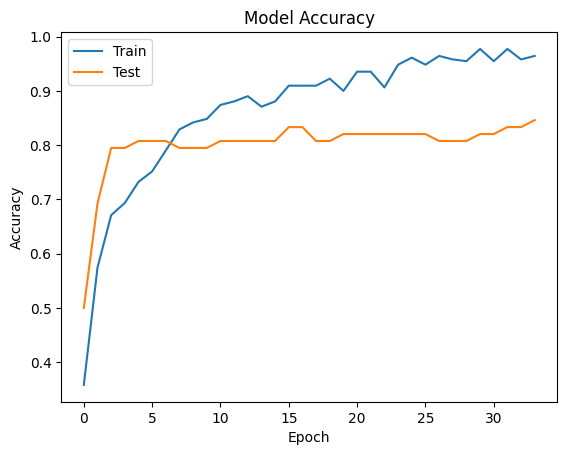

In [ ]:
# Visualize training accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

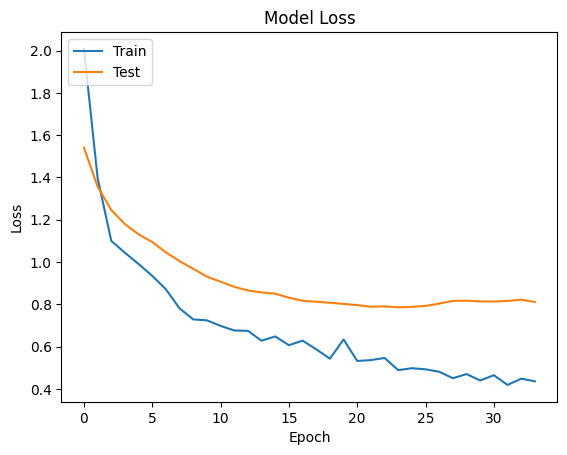

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
